In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
%cd /content/gdrive/MyDrive/New dataset
%cd car-resale/

/content/gdrive/.shortcut-targets-by-id/16839s2DSIHOiHQWpGCBaMJPSKxaon5hx/New dataset
/content/gdrive/.shortcut-targets-by-id/16839s2DSIHOiHQWpGCBaMJPSKxaon5hx/New dataset/car-resale


In [3]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 44.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

#Libraries for models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier


#Liblaries for cross validation and model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score

In [7]:
dataSet= pd.read_csv("Car details v3.csv")

In [8]:
dataSet

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


Test code

In [9]:
dataSet.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
dataSet.shape

(8128, 13)

In [11]:
dataSet.dropna()
dataSet.shape

(8128, 13)

In [12]:
dataSet['year']= 2023-dataSet['year']

In [13]:
dataSet.fillna('n/a', inplace=True)

In [15]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        8128 non-null   object
 9   engine         8128 non-null   object
 10  max_power      8128 non-null   object
 11  torque         8128 non-null   object
 12  seats          8128 non-null   object
dtypes: int64(3), object(10)
memory usage: 825.6+ KB


In [16]:
dataSet.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [17]:
dataSet.describe()

,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,9.195989,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,3.000000,2.999900e+04,1.000000e+00
25%,6.000000,2.549990e+05,3.500000e+04
50%,8.000000,4.500000e+05,6.000000e+04
75%,12.000000,6.750000e+05,9.800000e+04
max,40.000000,1.000000e+07,2.360457e+06


In [18]:
# Upper percentile and lower percentile based on price cars
price_1 = dataSet['selling_price'].quantile(0.99) # Upper
price_2 = dataSet['selling_price'].quantile(0.1)  # Lower 
print(price_1)
print(price_2)

5200000.0
150000.0


In [19]:
# Upper and lower percentile based on odometer
odometer_1 = dataSet['km_driven'].quantile(0.99) # Upper
odometer_2 = dataSet['km_driven'].quantile(0.1)  # Lower
print(odometer_1)
print(odometer_2)

225000.0
15000.0


In [20]:
# Take a range based on upper and lower percentile price and odometer cars
dataSet = dataSet[(dataSet['selling_price'] < price_1) & (dataSet['selling_price'] > price_2)]
data = dataSet[(dataSet['km_driven'] < odometer_1) & (dataSet['km_driven'] > odometer_2)]

In [21]:
# Check new dataset describe
data.describe()

,year,selling_price,km_driven
count,6365.000000,6.365000e+03,6365.000000
mean,8.768421,6.182776e+05,71985.097879
std,3.065200,6.336355e+05,39585.791721
min,3.000000,1.510000e+05,15151.000000
25%,6.000000,3.000000e+05,40000.000000
50%,8.000000,4.599990e+05,66953.000000
75%,11.000000,6.800000e+05,100000.000000
max,28.000000,5.150000e+06,222300.000000


In [22]:
# Check for a new count of rows and columns   
data.shape

(6365, 13)

In [23]:
dataSet['first_word'] = dataSet['name'].str.split().str.get(0)

<ipython-input-23-6393da3b3bb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['first_word'] = dataSet['name'].str.split().str.get(0)


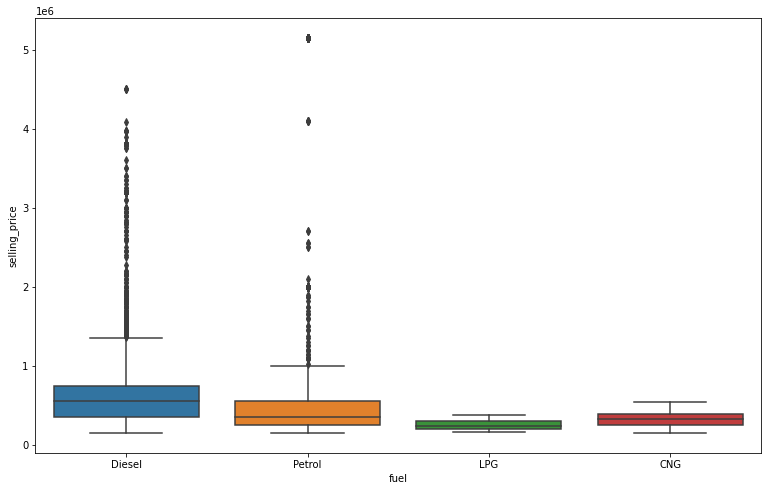

In [24]:
# Visualization price vs manufacturer cars
fig = plt.figure(figsize=(13, 8))
sns.boxplot(data=data, x='fuel', y='selling_price')
plt.show()

<AxesSubplot:xlabel='first_word', ylabel='selling_price'>

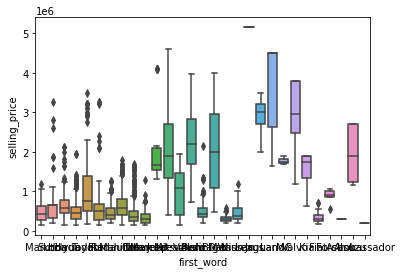

In [25]:
sns.boxplot(x='first_word', y='selling_price', data=dataSet)

<AxesSubplot:>

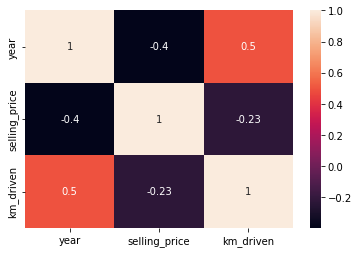

In [26]:
# Plot correlation dataset 
sns.heatmap(data.corr(), annot=True)

In [27]:
 X= dataSet.drop(columns=["selling_price","transmission","first_word","km_driven"])
 y= dataSet[['selling_price']]

In [28]:
X = pd.get_dummies(X)
X.shape

(7185, 3072)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25) #splitting the data into train and test

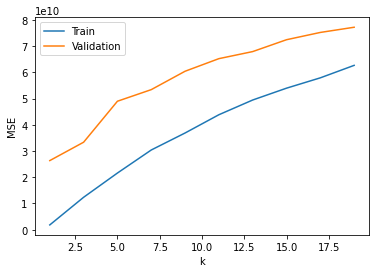

Best value of k: 1


In [30]:
#this part is find the best value of K
k_values = np.arange(1, 21, 2)

# Initialize lists to store training and validation errors
train_errors = []
val_errors = []

# Loop over different values of k
for k in k_values:
    # Train KNN model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Evaluate on training set
    y_train_pred = model.predict(X_train)
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    # Evaluate on validation set
    y_val_pred = model.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    val_errors.append(val_error)

# Plot the training and validation errors as a function of k
import matplotlib.pyplot as plt

plt.plot(k_values, train_errors, label='Train')
plt.plot(k_values, val_errors, label='Validation')
plt.xlabel('k')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Find the best value of k based on the validation error
best_k = k_values[np.argmin(val_errors)]
print('Best value of k:', best_k)

In [31]:
# Train KNN model
k = 3 # number of neighbors
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [32]:
# Test model
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print("KNN model score: ", score)
# Evaluate the performance of the model
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

KNN model score:  0.9234341807000126
MAE: 86276.02077536636
MSE: 33348045111.407906


In [33]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
mse_scores = []
r2_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)

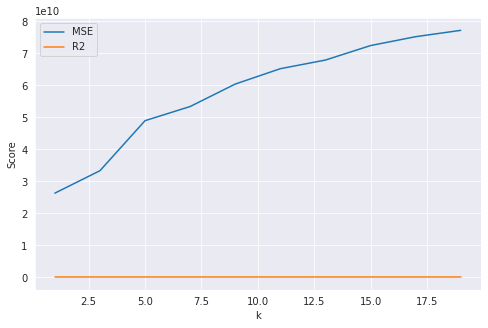

In [34]:
# Plot MSE and R2 vs k using Seaborn
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=k_values, y=mse_scores, label="MSE", ax=ax)
sns.lineplot(x=k_values, y=r2_scores, label="R2", ax=ax)
ax.set_xlabel("k")
ax.set_ylabel("Score")
ax.legend()
plt.show()